# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [78]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [79]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

mean 	12000.297727 	5796.265909 	7951.277273 	3071.931818 	2881.493182 	1524.870455

In [80]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import random
(a,b,c) = (random.randint(0,439), random.randint(0,439), random.randint(0,439))
indices = [220, 17, 100]
print indices
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

[220, 17, 100]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14755,899,1382,1765,56,749
1,5876,6157,2933,839,370,4478
2,11594,7779,12144,3252,8035,3029


In [81]:
# analyze samples
# code received from first review compares sampes against mean and median
print "sample - mean"
display(samples - np.round(data.mean()))
print "sample - median"
display(samples - np.round(data.median()))


sample - mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2755.0,-4897.0,-6569.0,-1307.0,-2825.0,-776.0
1,-6124.0,361.0,-5018.0,-2233.0,-2511.0,2953.0
2,-406.0,1983.0,4193.0,180.0,5154.0,1504.0


sample - median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6251.0,-2728.0,-3374.0,239.0,-760.0,-217.0
1,-2628.0,2530.0,-1823.0,-687.0,-446.0,3512.0
2,3090.0,4152.0,7388.0,1726.0,7219.0,2063.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**<br/>
Following comments are made based on the knowledge that the two categories are restaurants and retailer.<br/>
0: High value for Fresh with respect to both mean and median indicates that this may be a restaurant.<br/>
1: Somewhere between sample 0 and sample 2 as this does not agree with either of the other two points in terms of difference from mean. Relatively high value for Delicatessen may indicate that this could be deli so could be categorized along with restaurants.<br/>
2: High value for milk, groceries, detergents etc with respect to mean and median indicates that maybe a retailer stocking non-perishables and preservables<br/>

sample 0 and sample 2 are two extremes because wherever sample 0 is above mean sample 2 is below and vice versa.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import fbeta_score
from operator import itemgetter

# code suggested by first review
#zip(new_data, regressor.feature_importances_)
for target_feature in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.copy().drop([target_feature], 1)
    #display(new_data.describe())
    #print(data['Milk'])
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[target_feature], 
                                    test_size = 0.25, random_state = 0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    predictions_test = regressor.predict(X_test)
    score = regressor.score(X_test, y_test)
    print target_feature, score
    print sorted(zip(data, regressor.feature_importances_),key=itemgetter(1), reverse=True)

Fresh -0.252469807688
[('Grocery', 0.45990587237272312), ('Fresh', 0.17933073357941559), ('Milk', 0.14508791388110318), ('Detergents_Paper', 0.12494625609229409), ('Frozen', 0.090729224074464015)]
Milk 0.365725292736
[('Frozen', 0.48140503222052405), ('Milk', 0.22779840166557785), ('Fresh', 0.14678611932194763), ('Detergents_Paper', 0.13221384352479759), ('Grocery', 0.011796603267152853)]
Grocery 0.602801978878
[('Frozen', 0.8698771771245366), ('Milk', 0.064525286318322786), ('Fresh', 0.028130469062011415), ('Grocery', 0.024749564384700735), ('Detergents_Paper', 0.012717503110428378)]
Frozen 0.253973446697
[('Detergents_Paper', 0.44772741407740219), ('Fresh', 0.20588895254255626), ('Frozen', 0.16243073114564546), ('Milk', 0.11687498560613246), ('Grocery', 0.067077916628263581)]
Detergents_Paper 0.728655181254
[('Grocery', 0.90405291345501293), ('Fresh', 0.030675525448849477), ('Milk', 0.026518404256752448), ('Detergents_Paper', 0.022940401038836933), ('Frozen', 0.015812755800548101)]
D

In [83]:
target_feature = 'Milk'
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy().drop([target_feature], 1)
#display(new_data.describe())
#print(data['Milk'])
# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data[target_feature], 
                                test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
predictions_test = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print(score)

0.365725292736


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**<br/>
The feature was Milk. Score is 0.36. Based on the score I think the feature is necessary though from the statistics above it appears to be correlated with Groceries.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

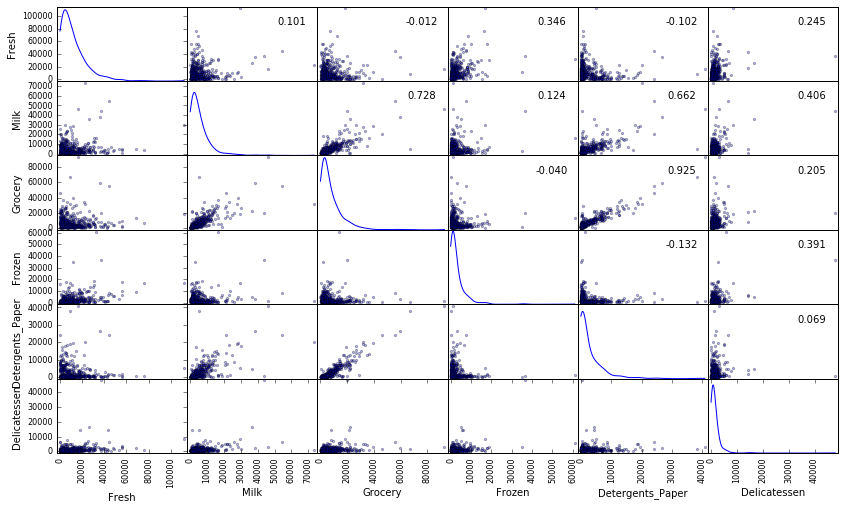

In [84]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
# code received from review 1
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**<br/>
Milk is somewhat correlated with both Groceries (corr coeff 0.728) and Detergent_Paper (corr coeff 0.662). Detergent_paper is highly correlated with Grocery (corr coeff 0.925). Based on the scatter matrix I believe that Milk could be eliminated without much loss of information. It confirms my suspicion that the feature Milk is not relevant feature. Milk is skewed right and has a long tail which indicates it may have lot of outliers.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

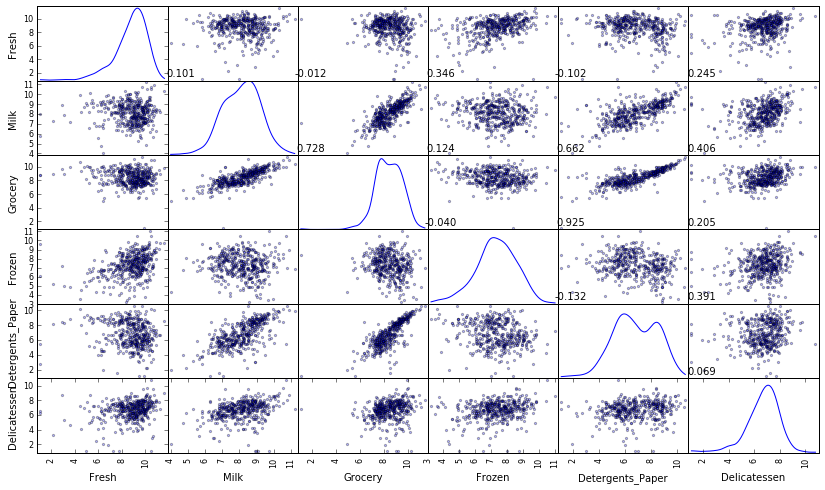

In [85]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
# code received from review 1
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.1, 0.1), xycoords='axes fraction', ha='center', va='center')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [86]:
display(log_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [87]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.599337,6.801283,7.231287,7.475906,4.025352,6.618739
1,8.678632,8.725345,7.983781,6.732211,5.913503,8.406932
2,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [88]:
outliers_lst = [] # List of ALL outliers -- will be used to find frequency later
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    log_data_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(log_data_outliers)
    # from review 1 and 2 -- consider a point as outlier only it is determined to be outlier for 2 or more features
    display(log_data_outliers.index)
    # accummulate all outlier index values
    outliers_lst += list(log_data_outliers.index)
    
# OPTIONAL: Select the indices for data points you wish to removeoutliers
# from reviews 1 and 2 consider a point as outlier if it appears in the outliers list for at least 2 features
outliers_array = np.array(outliers_lst)
unique, counts = np.unique(outliers_array, return_counts=True) # index, frequency
#print unique
#print counts
outliers = [ unique[x] for x in range(len(unique)) if counts[x] > 1]
print "Index of ourliers are:"
display(outliers)
print "Outliers are"
display(log_data.loc[outliers])
print "Outliers - Median"
display(log_data.loc[outliers] - log_data.median())
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
            357, 412],
           dtype='int64')

Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Int64Index([86, 98, 154, 356], dtype='int64')

Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Int64Index([75, 154], dtype='int64')

Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Int64Index([38, 57, 65, 145, 175, 264, 325, 420, 429, 439], dtype='int64')

Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Int64Index([75, 161], dtype='int64')

Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Int64Index([66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
            343],
           dtype='int64')

Index of ourliers are:


[65, 66, 75, 128, 154]

Outliers are


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outliers - Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,-4.605635,1.754164,2.265593,-3.746869,3.390370,0.387878
66,-6.851062,-0.860525,0.444473,-2.165602,1.446316,-3.576808
75,0.874906,-1.160011,-7.368445,1.060562,-5.606405,0.009793
128,-4.106644,0.891674,-0.218266,-2.374561,0.262891,-5.774033
154,-2.615346,-4.188826,-3.547076,-3.012900,-4.759108,-4.793203


 the distribution for each of the features after removing the outliers


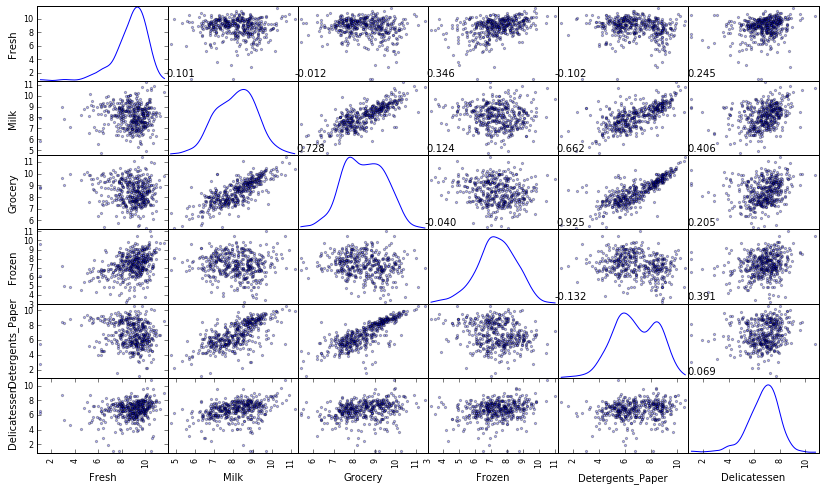

In [89]:
axes = pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
# code received from review 1
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.1, 0.1), xycoords='axes fraction', ha='center', va='center')
print " the distribution for each of the features after removing the outliers"

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**<br/>
Yes all features have outliers based on 1.5 * IQR. From the scatter matrix it is clear that Fresh, Milk and Delicatessen are skewed left and may benefit from these outliers removed. It appears that the outliers deviate significantly from the median for these features. Also from the data description it is evident that the minimum value for each of the features is not just way below the mean but also way below the first quartile (25%). All the graphs in the scatter matrix have a longer tail to the left of the mean. I have decided to remove the outliers from the log data.

-- From Review 1 and 2 feedback --<br/>
Consider a point as outlier if it is an outlier for 2 or more features
The index values of outliers are 65, 66, 75, 128, 154<br/>
Looking at the (outlier - median) data above, it is evident that the values are very small for at least 2 of the features for each of the outliers

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Cumulative Explained Varience: [ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


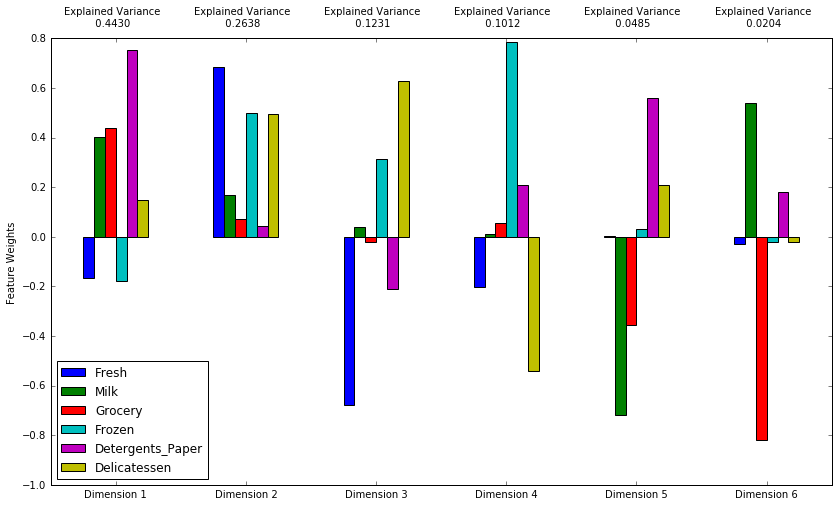

In [90]:
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)
# code received from Review 1
print "Cumulative Explained Varience:", np.cumsum(pca.explained_variance_ratio_)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**<br/>
0.7068 is explained by first and second principal components<br>
0.9310 is explained by first four principal components<br/>

Dimension 1
-----------
This dimension is highly corrlated with Detergents_Paper, Groceries and Milk. That means higher values in this dimension would indicate the customer buys more of these products. This value increases with increase in spending on Detergents_Paper, Groceries and Milk. This dimension could repreasent Retail customers.

Dimension 2
-----------
This dimension is highly correlated with Frozen, Fresh and Delicatessen products. High values in this dimension indicate high spending on Frozen, Fresh and Delicatessen products. This dimension could represent Restaurants and Delis.

Dimension 3
-----------
Looking at the absolute values, this dimension is correlated with Fresh and Delicatessen. These customers are buying lot of Fresh products and less or Delicatessen or they are buying lot of Delicatessen and less of Fresh products.

Dimension 4
----------
This dimension is correlated with Frozen and Delicatessen. It may represent points that have high values for Frozen and low values for Delicatessen or low values for Frozen and high values for Delicatessen.


---- Review 2 comments ----


This is a good discussion and certainly meets specifications. In general understanding PCA is very hard and hurts most peoples heads. I'll just give some more ways to think about it here.

One intricacy with PCA, that makes it quite difficult to do this kind of analysis is the following:

We cannot interpret the sign ( + / - ) as representing increased or decreased spending in a particular feature. The signs are actually reversible, and if you run it multiple times on your computer you may have noticed this
http://stats.stackexchange.com/questions/30348/is-it-acceptable-to-reverse-a-sign-of-a-principal-component-score

Remember PCA is a dimension, it's a new "feature", but each store is customer data point is affected by the PCA dimensions differently. How they are affected is what we are looking at.

When doing your analysis I suggest you focus on the absolute values. For example:

When we transform our data, the values for "Dimension 3" show us that...

    Some customers have a large positive 3rd component value — they are likely buying more of the positive-weight features while buying less of the negative-weight features.
    There are also customers that have a large negative 3rd component value — they buy less of the positive-weight features while buying more of the negative-weight features.

---- End Review 2 comments -----


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [91]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.3331,0.1830,-0.0061,-0.6771,-0.1655,-0.2403
1,-0.2575,0.5179,1.1702,-1.5806,-0.4159,0.5328
2,2.3579,1.7393,0.2210,0.2840,0.5939,0.0148


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [92]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [93]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.3331,0.1830
1,-0.2575,0.5179
2,2.3579,1.7393


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

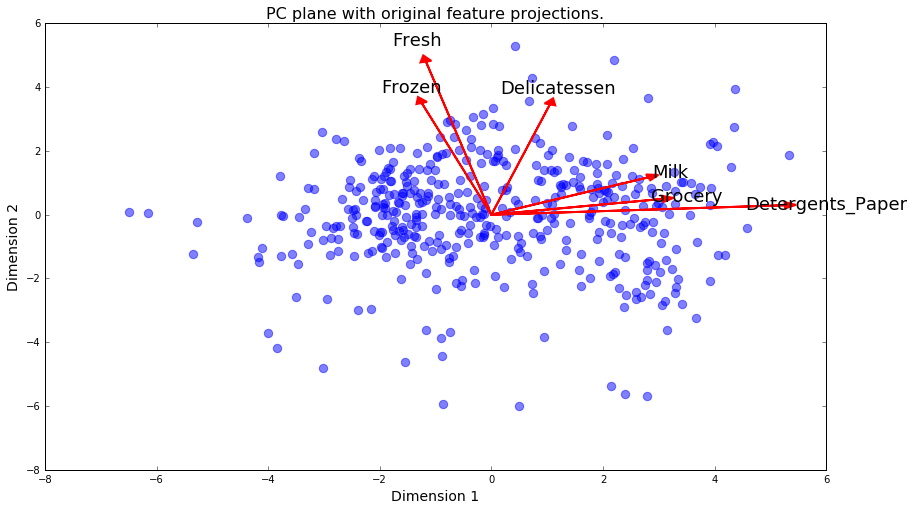

In [94]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**<br/>
K-Means clustering: 
------------------
Easy to implement, easy to understand and generally scalable for small number of clusters. Gives best result where clusters in the data are clearly separated. This model uses a distance metric to determine which cluster each point belongs to. In this case each point would belong to the cluster whose center (mean) it is closest to.<br/>

Gaussian Mixture Model: 
----------------------
Fast learning, eoes not assume circular shape of cluster (like k-means). The model does soft assignments to clusters, that is in this model every point would belong to each of the clusters with some probability.<br/>

I would try Gaussian Mixture Model. The features are normalized. Transformed features are independent. From the plot of the PC1 and PC2 plot above it appears that the clusters are not clearly demarcated thus hard assignments of points (bu k-means) to clusters on the intersection of the clusters may not provide sufficient information. Knowing probability of a point belonging to each of the clusters may be useful for points that are on the intersection of the clusters.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [95]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
for i in range(2,6):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=i).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print i, score

2 0.411818864386
3 0.394205319352
4 0.332857371227
5 0.295441470747


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**<br/>
2 clusters<br/>
-- From Review 2 --<br/>
Consider 3 clusters to see the third cluster including only outliers

In [96]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
print "centers:", centers

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print score

centers: [[-1.30917139  0.1428472 ]
 [ 1.63707508 -0.17862565]]
0.411818864386


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

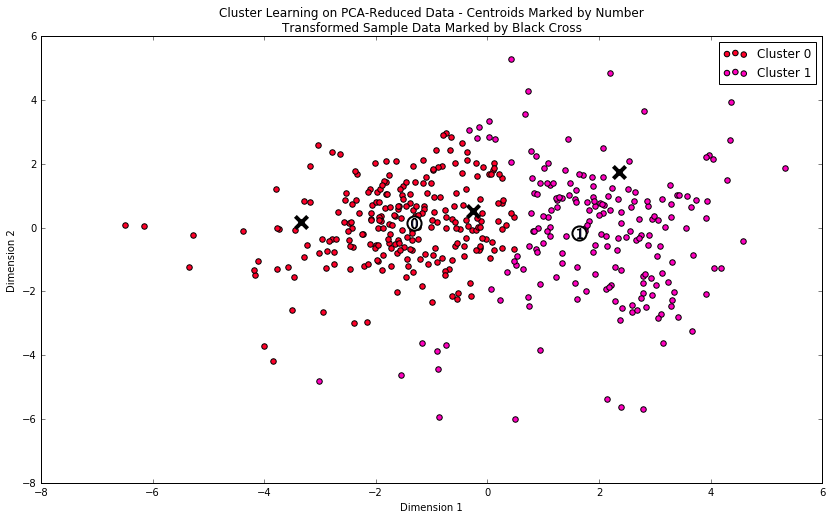

In [97]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Sement 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
data Median,8504.0,3627.0,4755.5,1526.0,816.5,965.5
data Mean,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
Seg0 - Median,308.0,-1575.0,-2067.0,532.0,-479.0,-254.0
Seg1 - Median,-4188.0,2720.0,4799.0,-490.0,2230.0,-21.0


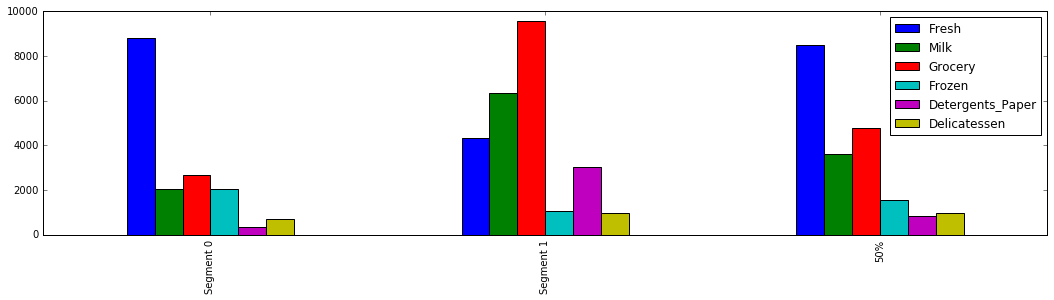

In [98]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers) 
# adapted from code received in Review 1
true_centers = true_centers.append(data.describe().ix['50%'])
ax = true_centers.plot(kind = 'bar', figsize = (18, 4), legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
true_centers = true_centers.append(np.round(data.describe().ix['mean']))
#true_centers = true_centers.append(true_centers[0:2] - np.round(data.mean()))
true_centers = true_centers.append(true_centers[0:2] - np.round(data.median()))
true_centers.index = ['Segment 0', 'Sement 1', 'data Median', 'data Mean', 
                      #'Seg0 - Mean', 'Seg1 - Mean', 
                      'Seg0 - Median', 'Seg1 - Median']
display(true_centers)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**<br/>

Segment 0
------------------
Comparing cluster center with median ('Seg0 - Median' row in the table above), this segment center has higher than median values for features Fresh and Frozen. The center also has values less than median for Milk, Groceries, Detergent_Paper. This generally represents **Restaurants**.<br/>

Segment 1
---------
Comparing cluster center with median ('Seg0 - Median' row in the table above), the segment center has higher then median values for features Milk, Groceries and Detergent_Paper. This would indicate this Segment 0 represents **Retail** customers. Same is evident by comparing the bargraph for segment 0 with the bargraph of median (50%).


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [99]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [102]:
print "Sample - Median"
display(samples - data.median())
print "Sample Cluster Probability"
display(clusterer.predict_proba(pca_samples))
print "Transformed sample points"
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Sample - Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6251.0,-2728.0,-3373.5,239.0,-760.5,-216.5
1,-2628.0,2530.0,-1822.5,-687.0,-446.5,3512.5
2,3090.0,4152.0,7388.5,1726.0,7218.5,2063.5


Sample Cluster Probability


array([[ 0.99007797,  0.00992203],
       [ 0.77332161,  0.22667839],
       [ 0.07593949,  0.92406051]])

Transformed sample points


,Dimension 1,Dimension 2
0,-3.3331,0.1830
1,-0.2575,0.5179
2,2.3579,1.7393


**Answer:**<br/>
Sample points 0 and 1 are in Cluster 0 whereas Sample point 2 is in Cluster 1.
Looking at the "Sample - Median" table above and the predicted probability from GMM:<br/>

Sample 0
---------
This has value below Median for features Milk, Grocery, Detergent_Paper and Delicatessen. It also has value above median for Fresh and Frozen which are the features strongl represented in Cluster 0. Probability of this point belonging to Segment 0 is 0.99 which indicates this point is a strong representative of Cluster 0.<br/>
Looking at the PCA transformed value for sample 0 we see that this point has a negative value (-3.3331) in Dimension 1. From the scatter plot we see that the cluster boundary is almost a vertical line where Dimension 1 = 0.5. So approximately all points where Dimension 1 < 0.5 belong to Cluster 0.

Sample 1
--------
This point is more likely decided by low values for features that strongly represent Segment 1 than high values for features (Fresh and Frozen) that strongly represent Segnemnt 0. The probability of this point for Segment 0 is 0.77 which is not that high compared to Sample 0.<br/>
Looking at the PCA transformed value for sample 1 we see that this point has a negative value (-0.2575) in Dimension 1. From the scatter plot we see that the cluster boundary is almost a vertical line where Dimension 1 = 0.5. So approximately all points where Dimension 1 < 0.5 belong to Cluster 0.

Sample 2
--------
This point has higher then median values for Milk, Groceries, Detergents_Paper which indicate it belongs to Segment 1 which represents Retailer. This has a high probability (0.924) of belonging to Segment 1.<br/>
PCA transformed value fot this sample point has a positive value (2.3579) for Dimension 1 which makes it belong to Cluster 1

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**<br/>
Within each segment some customers should be given 5 days service and smaller test set 3 days service. The attrition rate within each segment should be observed to determine if it impacts the two segments of customers the same or unevenly. It is also possible that the customers in either segment would not complain.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**<br>
Now that we know the segments to which each custmer belongs, a supervised learner could be trained by using the reduced dimension points as features and their corresponding segment (0,1) as target. The estimated values for product categories for new customers could be reduced to 2 dimensions by passing through PCA. These points (features) then could be used to predict the segment from the supervised learner.

A faster method could probably be to just find the distance of the reduced dimension points for the new customers from the two cluster centers and assign each point to the cluster that it is closest to.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

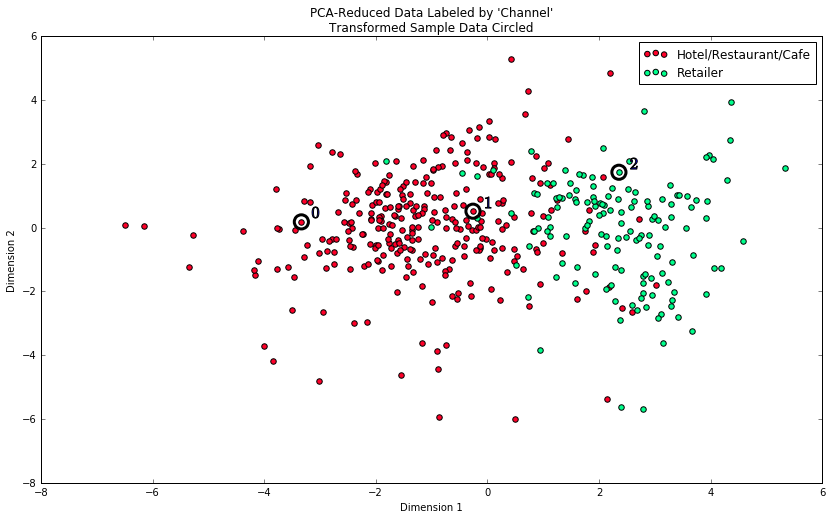

In [103]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**<br/>
The clusters appear to be quite similar but for some mix at the border of the clusters. The underlying distribution has points that would be misclassified by the clustering algorithm. Clustering algorithm would produce more false positives for cluster 1 (there are more points in underlying distribution that belong to segment 0 (red) but would be classified as segment 1 by the clustering algorithm). For majority of the points the clusters agree with the underlying distribution and the clusters could be treated as either Retailer or Restaurants. Segment 0 could be considered as Restaurants and Segment 1 could be considered as Retailers.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.